In [1]:
import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns


## Analyse empirique et traitement des données

In [2]:
data=pd.read_csv("train.csv")
data.head()

,id,AP,creation_date_answer,situation,ctc,location,gc_id,gc_label,creation_date_global,id_group,id_group_2,favorite_fruit,fruit_situation_id,fruit_situation_label,fruits_or_vegetables,number_of_fruit,id_group_3,creation_date_request,hobby,id_group_4,ville,green_vegetables,vegetable_type,target
0,a46cfa61ea20a,f,2019-03-13 11:14:42.549,-1,NaN,52,70,G,2019-01-17 10:50:57.767,2d7e206d46ea1,36bac09400660,poire,120,jzy,NaN,-1,812a43d710ace,2019-03-13 11:14:42.549,football,aa8f4934a31eb,NaN,f,NaN,0
1,c3d0cb8f0c5e2,f,2019-03-21 14:27:32.441,-1,NaN,78,10,A,2018-08-20 05:57:51.038,35e96d6848871,80a697d593706,clementine,10,ae,NaN,-1,4b59257f24573,2019-03-21 14:27:32.441,football,6ff9ea9ec85fd,NaN,f,NaN,1
2,05dfbe0ec3a8b,f,2019-03-15 17:49:50.67,-1,NaN,70,10,A,2018-12-20 13:45:51.752,ffaf8085e383d,c309176b96268,clementine,200,ag,NaN,-1,f1a838f0d194b,2019-03-15 17:49:50.67,football,6a49a0a97b049,NaN,f,NaN,0
3,952e869ee1076,f,2019-01-07 08:19:29.114,-1,f,84,10,A,2018-07-21 10:28:49.386,5360cf0a40ce3,13c1a3597648b,clementine,10,ae,NaN,0,c3196847d1c14,2019-01-07 08:19:29.114,football,d0dcf1ca1bf04,NaN,f,NaN,1
4,5bd0e71b1395b,f,2019-02-03 17:57:22.926,-1,NaN,29,20,D,2018-12-07 19:59:26.968,126c3211f23fc,7b68e0a456571,clementine,10,ae,NaN,-1,70e18c6fe58cd,2019-02-03 17:57:22.926,football,b4870b1c8eb42,NaN,f,NaN,1


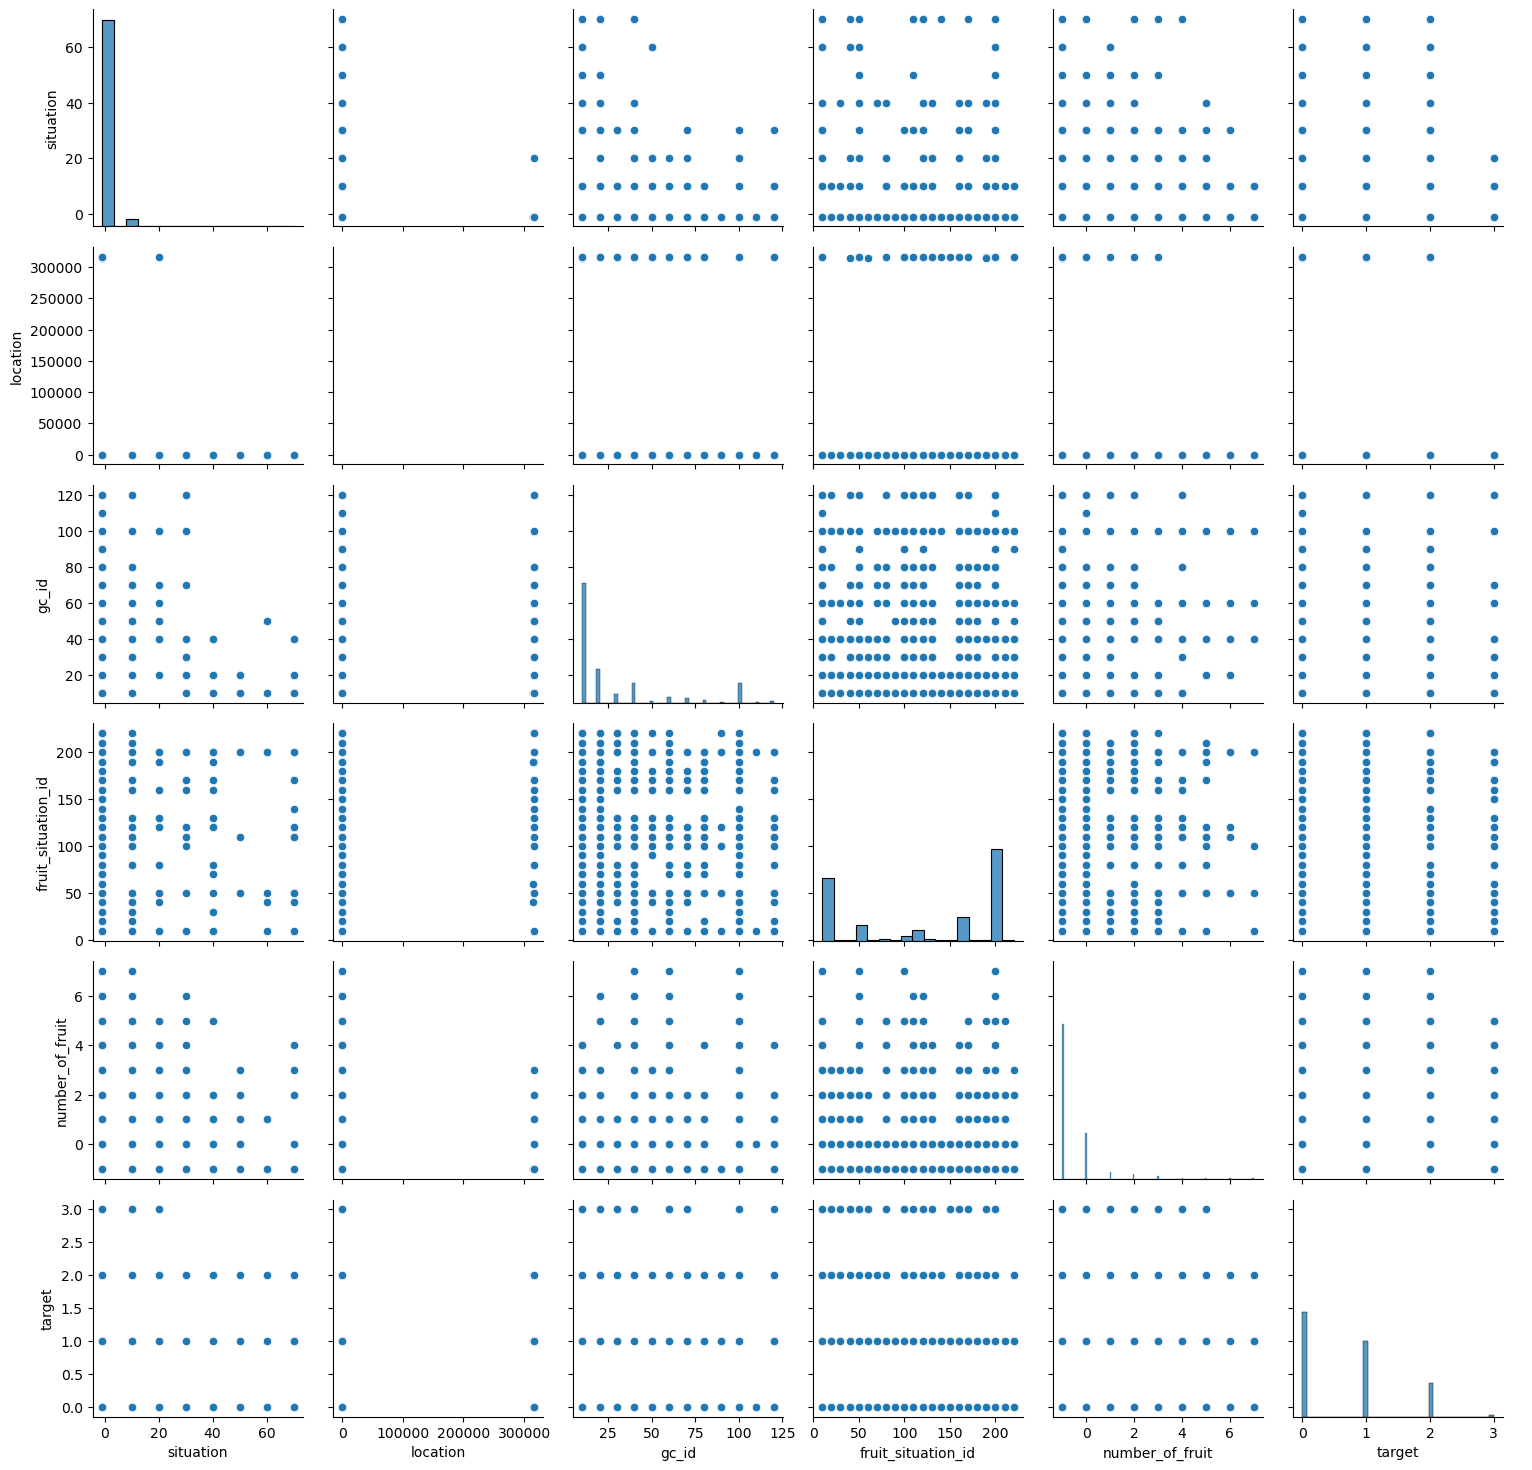

In [3]:
g = sns.PairGrid(data)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()

On note qu'il y a peu d'observation dans la catégorie 3 de 'target'.

In [67]:
data_test=pd.read_csv("test.csv")
data_test.head()

,id,AP,creation_date_answer,situation,ctc,location,gc_id,gc_label,creation_date_global,id_group,id_group_2,favorite_fruit,fruit_situation_id,fruit_situation_label,fruits_or_vegetables,number_of_fruit,id_group_3,creation_date_request,hobby,id_group_4,ville,green_vegetables,vegetable_type
0,cb7a4e0dd0777,f,2019-03-13 07:00:52.562,30,NaN,100,40,B,2019-03-13 07:03:13.632,b6a3d931cbbaf,c9cc8f25f33cd,poire,120,jzy,t,1,bc3a12cac647f,2019-03-13 07:00:52.562,football,b78bd3c9f945c,Saint-Leu,f,NaN
1,e78e3915f3e30,f,2019-01-07 13:45:55.741,-1,f,95,40,B,2018-12-18 18:28:41.942,1b35749232404,cc429927fe144,poire,50,hetz,t,1,79aa2c96bd0fc,2019-01-07 13:45:55.741,football,6fed1653be26d,Créteil,f,NaN
2,8e65ba155f983,f,2019-01-25 14:01:07.041,-1,f,34,20,D,2018-01-17 13:12:05.124,8f7612ff2c9cc,cfaf2bb299ac6,clementine,200,ag,NaN,-1,4b634a698cc8e,2019-01-25 14:01:07.041,football,fb7b5da2ef839,Bordeaux,f,NaN
3,701e90ca03ce2,f,2019-01-16 14:35:11.432,10,f,45,40,B,2018-11-07 13:21:33.877,2e3620e03b5f3,bf01c06305abb,poire,200,ag,NaN,2,cccd30d947857,2019-01-16 14:35:11.432,football,3a230e52fb02e,Saint-Herblain,f,NaN
4,768fefec8609a,f,2019-02-11 14:25:37.331,10,f,95,100,H,2018-10-16 10:17:01.716,ac19c1e8abd0d,033ec37966b00,poire,50,hetz,f,2,62769fb7addda,2019-02-11 14:25:37.331,football,94c376f28ea60,Drancy,f,NaN


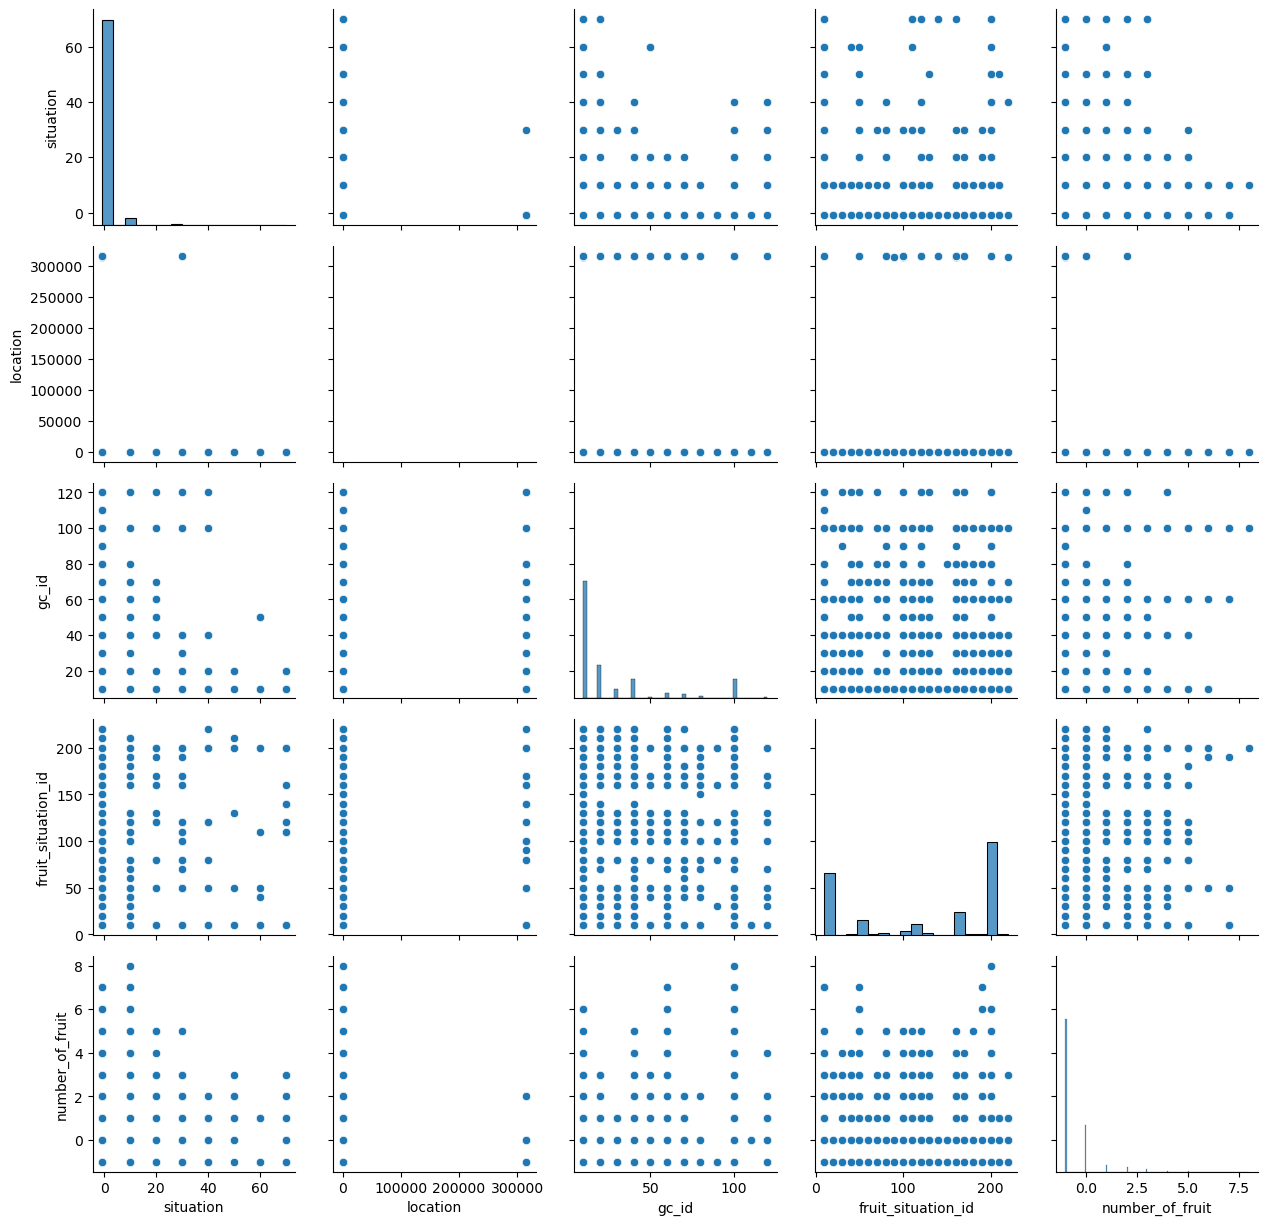

In [5]:
g = sns.PairGrid(data_test)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()

On remarque que la distribution des données est plus ou moins similaire pour les jeux de données train et test. C'est une bonne nouvelle. 

In [6]:
data.describe(include='all')

,id,AP,creation_date_answer,situation,ctc,location,gc_id,gc_label,creation_date_global,id_group,id_group_2,favorite_fruit,fruit_situation_id,fruit_situation_label,fruits_or_vegetables,number_of_fruit,id_group_3,creation_date_request,hobby,id_group_4,ville,green_vegetables,vegetable_type,target
count,25000,25000,25000,25000.000000,9620,25000.000000,25000.000000,25000,25000,25000,25000,25000,25000.000000,23272,7659,25000.000000,25000,25000,25000,25000,8088,25000,414,25000.000000
unique,25000,2,24278,NaN,2,NaN,NaN,12,15680,15844,15675,2,NaN,21,2,NaN,872,24280,3,15831,564,2,6,NaN
top,a46cfa61ea20a,f,2019-02-06 09:00:00,NaN,f,NaN,NaN,A,2018-04-25 13:46:28.524,9eac919417ab0,12c9978a3bdfb,clementine,NaN,ag,f,NaN,fa2eb9a81317a,2019-02-06 09:00:00,football,d51245edaef2b,Saint-Étienne,f,green,NaN
freq,1,24914,10,NaN,8991,NaN,NaN,13813,14,14,14,18147,NaN,10651,6394,NaN,298,10,24661,20,475,24564,227,NaN
mean,NaN,NaN,NaN,-0.347800,NaN,7619.508480,27.599600,NaN,NaN,NaN,NaN,NaN,121.597600,NaN,NaN,-0.579080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.690520
std,NaN,NaN,NaN,3.950982,NaN,48269.976002,28.670734,NaN,NaN,NaN,NaN,NaN,83.239587,NaN,NaN,0.858333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.761292
min,NaN,NaN,NaN,-1.000000,NaN,1.000000,10.000000,NaN,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,-1.000000,NaN,35.000000,10.000000,NaN,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,-1.000000,NaN,61.000000,10.000000,NaN,NaN,NaN,NaN,NaN,170.000000,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,-1.000000,NaN,81.000000,40.000000,NaN,NaN,NaN,NaN,NaN,200.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


Notons que la variable location a une variance assez extrême! Ceci est dû à un petit nombre de données qui ont une relativement très grande valeur 'location'. Puisque c'est le cas aussi dans les données test, je laisse ces points pour garder un bon pouvoir prédictif.  De plus, sans plus d'information sur la nature de la variable, je ne peux pas être sûr qu'il s'agisse d'une erreur de mesure.

La variable situation présente un peu la même particularité, dans une moindre mesure, avec une écrasante majorité de -1, et quelques valeurs relativement haute. Puisque les données test ont la meme particularité, je garde les données telles quelles.

In [7]:
data.isna().any()

id                       False
AP                       False
creation_date_answer     False
situation                False
ctc                       True
location                 False
gc_id                    False
gc_label                 False
creation_date_global     False
id_group                 False
id_group_2               False
favorite_fruit           False
fruit_situation_id       False
fruit_situation_label     True
fruits_or_vegetables      True
number_of_fruit          False
id_group_3               False
creation_date_request    False
hobby                    False
id_group_4               False
ville                     True
green_vegetables         False
vegetable_type            True
target                   False
dtype: bool

Les variables CATEGORIELLES ctc,fruit_situation_label,fruits_or_vegetables,ville,vegetable_type contiennent des valeurs manquantes. Puisque je n'ai aucune information sur leur nature, ou même sur pourquoi elles sont manquantes (MCAR, CAR, ou bien MNAR), je remplace les NaN par la valeur 'missing'. 

In [8]:
data.ctc.fillna('missing', inplace=True)
data.fruit_situation_label.fillna('missing', inplace=True)
data.fruits_or_vegetables.fillna('missing', inplace=True)
data.ville.fillna('missing', inplace=True)
data.vegetable_type.fillna('missing', inplace=True)


In [9]:
data['AP'] = pd.Categorical(data.AP)
data['ctc'] = pd.Categorical(data.ctc)
data['gc_label'] = pd.Categorical(data.gc_label)
data['favorite_fruit'] = pd.Categorical(data.favorite_fruit)
data['fruit_situation_label'] = pd.Categorical(data.fruit_situation_label)
data['fruits_or_vegetables'] = pd.Categorical(data.fruits_or_vegetables)
data['hobby'] = pd.Categorical(data.hobby)
data['ville'] = pd.Categorical(data.ville)
data['green_vegetables'] = pd.Categorical(data.green_vegetables)
data['vegetable_type'] = pd.Categorical(data.vegetable_type)
data['target'] = pd.Categorical(data.target)


On observe que les variables id, id_group, id_group2,id_group4 sont des variables catégorielles avec bcp trop de modalités par rapport au nombre d'observations dans le jeu de données train. Sans plus d'information sur leur potentielle utilité, je préfère les retirer de l'étude.

In [10]:
data=data.drop(['id','id_group','id_group_2','id_group_4'],1)

 Les variables temporelles creation_date_request,creation_date_answer, creation_date_global sont difficiles à traiter sans plus d'information sur leur nature. Je préfère les enlever également

In [11]:
data=data.drop(['creation_date_request','creation_date_answer','creation_date_global'],1)

Enfin, malgré un nombre de modalités raisonnable, la variable id_group_3 reste assez mystérieuse. S'il s'agit bien d'un id, alors je ne crois pas qu'il soit justifié de l'inclure dans l'étude. Sans plus d'information, je l'enlève.

In [12]:
data=data.drop(['id_group_3'],1)

In [13]:
data.head()

,AP,situation,ctc,location,gc_id,gc_label,favorite_fruit,fruit_situation_id,fruit_situation_label,fruits_or_vegetables,number_of_fruit,hobby,ville,green_vegetables,vegetable_type,target
0,f,-1,missing,52,70,G,poire,120,jzy,missing,-1,football,missing,f,missing,0
1,f,-1,missing,78,10,A,clementine,10,ae,missing,-1,football,missing,f,missing,1
2,f,-1,missing,70,10,A,clementine,200,ag,missing,-1,football,missing,f,missing,0
3,f,-1,f,84,10,A,clementine,10,ae,missing,0,football,missing,f,missing,1
4,f,-1,missing,29,20,D,clementine,10,ae,missing,-1,football,missing,f,missing,1


## Forêt aléatoire

Je choisis un modèle RandomForest car j'apprécie ce modèle pour ses bonnes capacités prédictives et l'interprétabilité relativement aisée de ses hyperparamètres. Néanmoins, je fais une étape de validation croisée pour sélectionner les valeurs de certains hyperparamètres d'intérêt. IMPORTANT : étant donné la faible puissance de mon ordinateur, je suis contraint d'enlever la variable 'ville' qui demande bcp de puissance de calcul étant donnée sa dimension.

In [14]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 130, num = 10)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# Création de la grid d'hyperparamètres
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

Je sépare le jeu de données test en deux (avec proportions respectives de 80% et 20%)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(["target",'ville'],1), data.target, test_size=0.2)
X_train=pd.get_dummies(X_train)
X_test=pd.get_dummies(X_test)


### Cross validation

In [31]:
rf = RandomForestClassifier()

rf_random1 = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 30, cv = 3, verbose=30, random_state=42, n_jobs = 5)
# Fit the random search model
rf_random1.fit(X_train, y_train)

[CV 3/3; 1/15] START bootstrap=False, max_depth=103, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000
[CV 3/3; 1/15] END bootstrap=False, max_depth=103, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000;, score=0.692 total time=  32.2s
[CV 2/3; 3/15] START bootstrap=True, max_depth=63, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200
[CV 2/3; 3/15] END bootstrap=True, max_depth=63, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.692 total time=   4.1s
[CV 1/3; 4/15] START bootstrap=True, max_depth=103, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1000
[CV 1/3; 4/15] END bootstrap=True, max_depth=103, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=1000;, score=0.692 total time=  20.1s
[CV 3/3; 4/15] START bootstrap=True, max_depth=103, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 23, 36, 50, 63, 76,
                                                      90, 103, 116, 130],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=30)

### Meilleurs hyper-paramètres

In [52]:
best_random = rf_random1.best_estimator_
rf_random1.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 116,
 'bootstrap': False}

Best cross val accuracy

In [58]:
rf_random1.best_score_

0.698100333507177

### Accuracy 

In [59]:
model_train=best_random.fit(X_train, y_train,)

In [60]:
best_random.score(X_test, y_test)

0.6984

L'accuracy du modèle est correcte.

# Génération des labels sur les données test.

### Model final (avec toutes les données train)

In [64]:
data_dum=data.drop(["target",'ville'],1)
data_dum=pd.get_dummies(data_dum)

In [65]:
model_final=rf_random1.best_estimator_.fit(data_dum, data.target,)

### Traitement données test

In [68]:
data_test.ctc.fillna('missing', inplace=True)
data_test.fruit_situation_label.fillna('missing', inplace=True)
data_test.fruits_or_vegetables.fillna('missing', inplace=True)
data_test.ville.fillna('missing', inplace=True)
data_test.vegetable_type.fillna('missing', inplace=True)
data_test['AP'] = pd.Categorical(data_test.AP)
data_test['ctc'] = pd.Categorical(data_test.ctc)
data_test['gc_label'] = pd.Categorical(data_test.gc_label)
data_test['favorite_fruit'] = pd.Categorical(data_test.favorite_fruit)
data_test['fruit_situation_label'] = pd.Categorical(data_test.fruit_situation_label)
data_test['fruits_or_vegetables'] = pd.Categorical(data_test.fruits_or_vegetables)
data_test['hobby'] = pd.Categorical(data_test.hobby)
data_test['ville'] = pd.Categorical(data_test.ville)
data_test['green_vegetables'] = pd.Categorical(data_test.green_vegetables)
data_test['vegetable_type'] = pd.Categorical(data_test.vegetable_type)
data_test=data_test.drop(['id_group','id_group_2','id_group_4'],1)
data_test=data_test.drop(['creation_date_request','creation_date_answer','creation_date_global'],1)
data_test=data_test.drop(['id_group_3'],1)

### Prédictions

In [69]:
data_test_dum=data_test.drop(['id','ville'],1)
data_test_dum=pd.get_dummies(data_test_dum)

In [70]:
model_final.predict_proba(data_test_dum)

array([[0.77085144, 0.12102034, 0.09709101, 0.01103721],
       [0.11603901, 0.35571952, 0.37122587, 0.1570156 ],
       [0.80145496, 0.11129064, 0.08527043, 0.00198396],
       ...,
       [0.18079962, 0.74353754, 0.07353182, 0.00213101],
       [0.82391277, 0.11896586, 0.04868214, 0.00843923],
       [0.56625576, 0.22524902, 0.20723887, 0.00125635]])

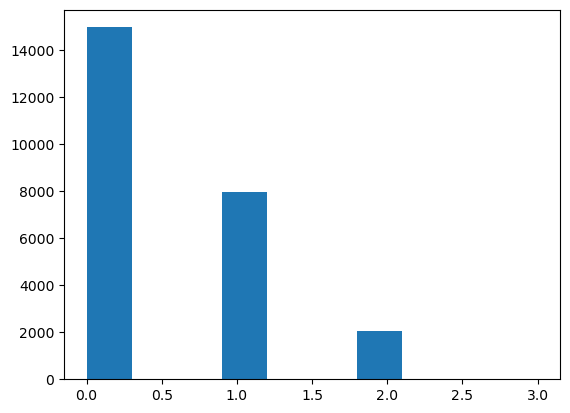

In [71]:
plt.hist(model_final.predict(data_test_dum))
plt.show()

In [73]:
np.sum(model_final.predict(data_test_dum)==3)

2

On note que peu de prédictions ont été faites dans la catégorie 3

In [76]:
output=pd.DataFrame(model_final.predict_proba(data_test_dum))
output['id']=data_test['id']
output=output.set_index('id')

In [77]:
output.to_csv(r'test_y.csv')

### Conclusion

Avec une connaissance plus précise des données, on aurait pu traiter les données manquantes de manière plus fine et envisager des modèles plus créatifs.

Il aurait sûrement été intéressant d'inclure la variable 'ville' mais la puissance de calcul disponible sur mon ordinateur est contraignante. De même, j'aurais pu me permettre de faire une meilleure étape de cross validation. 

Enfin, on  voit que le label '3' est très peu représenté dans les données et que cela peu être un facteur limitant pour la prédiction de cette classe.